#TrafficManagementController

##StartTrafficManagement

In [ ]:
// When bots (1 or more) are initialised with certain configuration (botId, initialStationId, etc.)
Start traffic Management;
// Traffic management toggle is a variable that tells if traffic management is running or not.
Initialise all the services
SET Traffic Management Toggle = TRUE;

while(Traffic Management Toggle is TRUE?)
{
  // Logs are saved in time-logs.txt
  LOG : Start Reading Bot Position;
  // (all bot position info. of bots whhich are trying to move or unstable)
  UPDATE unresolved bot positions;
  
  // (all the status info. of all stations)
  GET all station information;
  
  // (which bot is trying to request for which station what type of request)
  UPDATE bot station requests;
  // (how stations are allocated in respect to requesting bots for move)
  UPDATE station allocation plan;
  
  // (trigger motor action/command of all the bots)
  UPDATE motor status;
  

  LOG : Updated Motor Status;
  
  WRITE bot position in logs;
  
  LOG : Going for Sleep;
}
// (graph is actually an excel file which contains botIds and coordinates)
PLOT the traffic graph;
STOP
Return "Traffic Management Started";

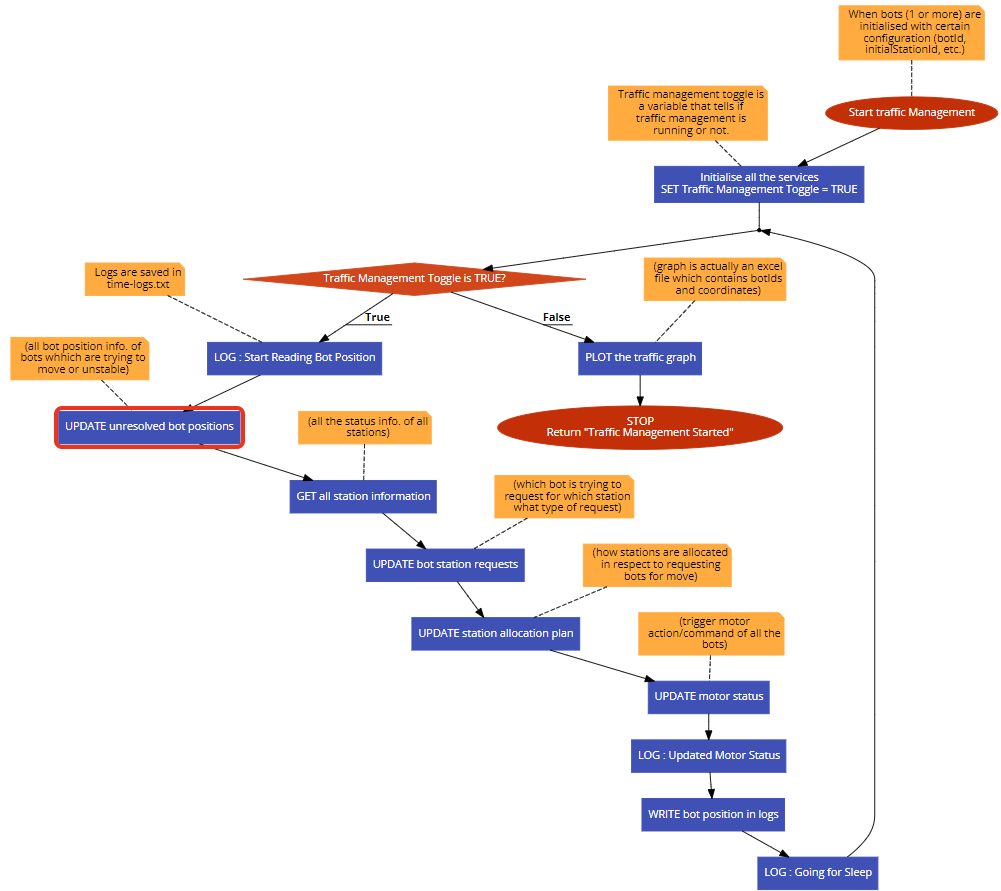

##StopTrafficManagement

In [ ]:
Stop Traffic Management;
SET Traffic Management Toggle = False;
Return True
"Traffic Management stopped";

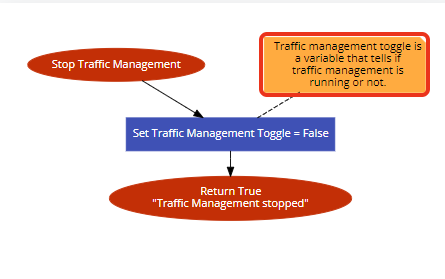

#Initialisation of Services

##BotPositionmanagementService

In [ ]:
//Initialising Services
BotPositionManagementService;
REMOVE any old bot-coordinate graph;
REMOVE any old bot-position graph;
SET botLogPositionId = 0;
// botPositions is a dictionary of {botId : BotPosition model}
CLEAR botPositions object;


BotStationRequestService;

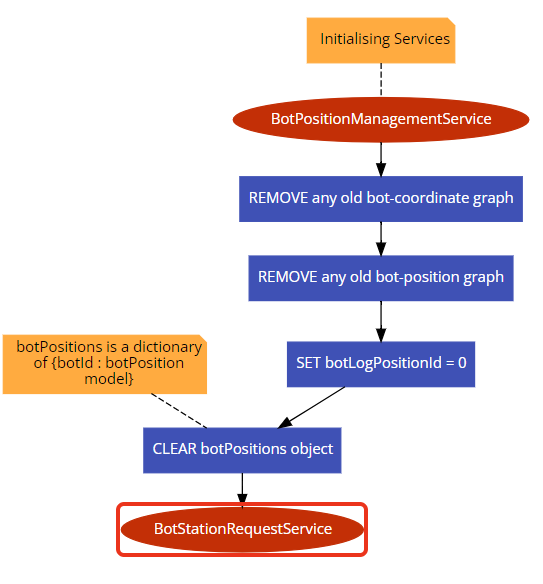

##BotStationRequestService

In [ ]:
BotStationRequestService;

// botStationRequests is a list of BotStationRequest model
CLEAR botStationRequests object;


StationAllocationService;

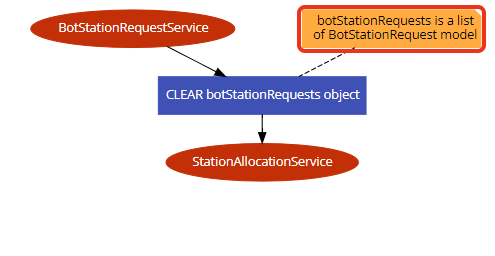

##StationAllocationService

In [ ]:
StationAllocationService;

// stationAllocationPlan is a dictionary of {stationId : StationTrafficModel}
CLEAR stationAllocationPlan object;
// station information is fetched from station-json-models
INITIALISE Stations, ADD ( stationId : new STM )
INTO stationAllocationPlan object;
MotorControlService;

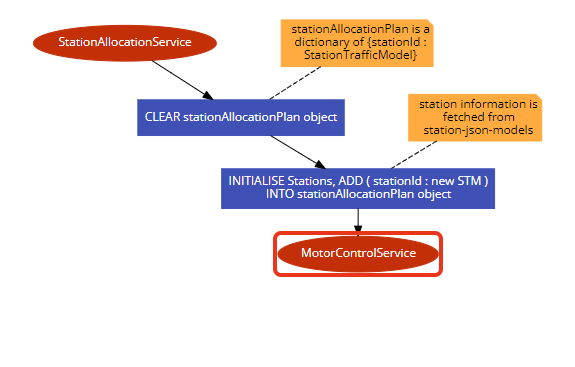

##MotorControlService

In [ ]:
MotorControlService;

// delete any old bot-motor graph (any status information about the motor of a bot)
DELETE motorStatusLogs;

SimulatorService;

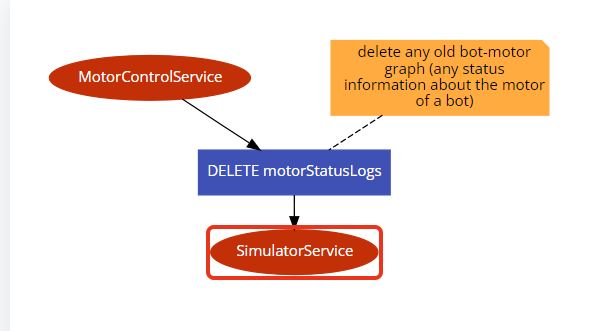

##SimulatorService

In [ ]:
SimulatorService;

// botPositions is a list of BotPosition model
CLEAR botPositions object;
// botCoordinates is a list of BotCoordinate model
CLEAR botCoordinates object;
SET iterationId = 0;

START while loop;

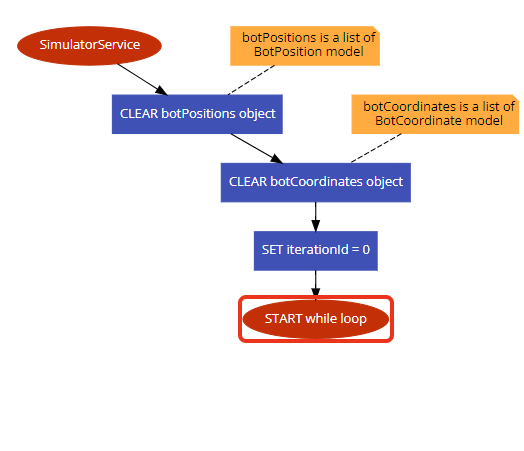

#StartTrafficManagementDetailed

In [ ]:
// When bots (1 or more) are initialised with certain configuration (botId, initialStationId, etc.)
Start traffic Management;
// Traffic management toggle is a variable that tells if traffic management is running or not.
Initialise all the services
Set Traffic Management Toggle = TRUE;

while(Traffic Management Toggle is TRUE?)
{
  // Logs are saved in time-logs.txt
  Logging the Start Reading Bot Position;
  // By using GetUnresolvedBotPositions in MotorControlService and UpdateBotPositions in BotPositionManagementService
  UPDATE unresolved bot positions
  (all bot position info. of bots whhich
  are trying to move or unstable);
  
  // From stationAllocationPlan object in StationAllocationService
  GET all station information
  (all the status info. of all stations);
  
  // By using unresolved bot positions and station info. as parameter for UpdateBotStationRequest in BotStationRequestService
  UPDATE bot station requests
  (which bot is trying to request for
  which station what type of request);
  // By using unresolved bot position and updated bot station requests as parameter for UpdateStationAllocationPlan in StationAllocationService
  UPDATE station allocation plan
  (how stations are allocated in
  respect to requesting bots for move);
  
  // By using unresolved bot position and updated allocation plan as parameter for UpdateMotorStatus in MotorControlService
  UPDATE motor status
  (Trigger motor action/command
  of all the bots);
  

  Logging the Updated Motor Status;
  
  // By using unresolved bot position as parameter for WriteBotPositionInLogs in Simulator Services
  WRITE bot position in logs;
  

  Logging the Going for Sleep;
}
// graph is actually an excel file which contains botIds and coordinates and drawn by PlotBotCoordinates in SimulatorService
PLOT the traffic graph;
STOP
Return "Traffic Management Started";

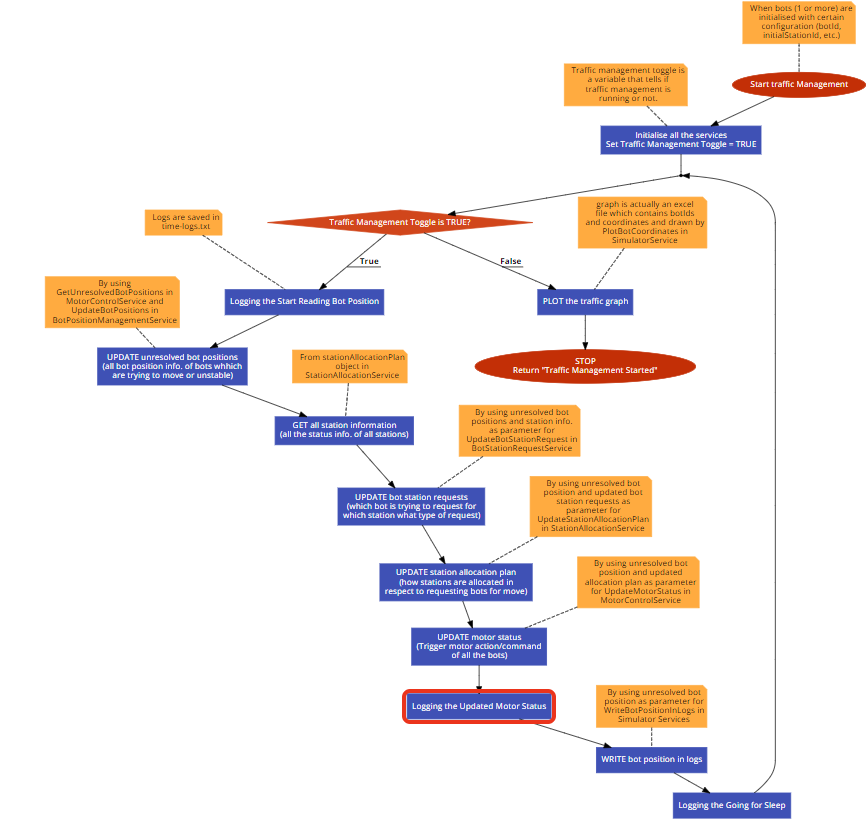

#PathPlanningController

##ReadEdges

In [ ]:
Read Edges;

// Edge information is fetched from a file edge-json-model.json into a list of EdgeJsonModel
GET edges;
Return List of all
edges information;

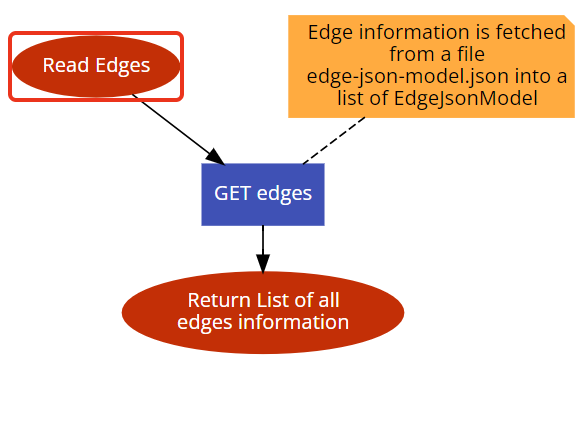

##PlotStations

In [ ]:
Plot Stations;

// Stations are created from the edges information (edge-json-model file) and station information is saved in station-json-model file.
CREATE stations;
Return List of all
stations information;

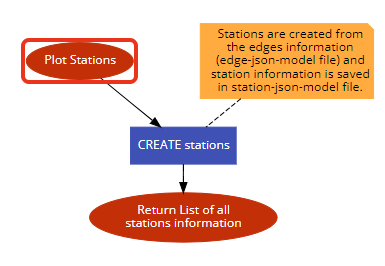

##PlotGraph

In [ ]:
Plot Graph;
Plot Graph Coordinates;
// Complex Function
GET Graph;
//Already existing graph file must be removed
DELETE all csv files;

//From Graph object
for(each EdgeJsonModel in
Graph.EdgeJsonModels)
{
  UPDATE logs in edge-coordinates file;
}
//From Graph object
for(each StationJsonModel in
Graph.StationJsonModels)
{
  UPDATE logs in node-coordinate file;
}
//Two new .csv files are created (nodes and edges)
return "Coordinates successfully plotted.
Check in log files.";

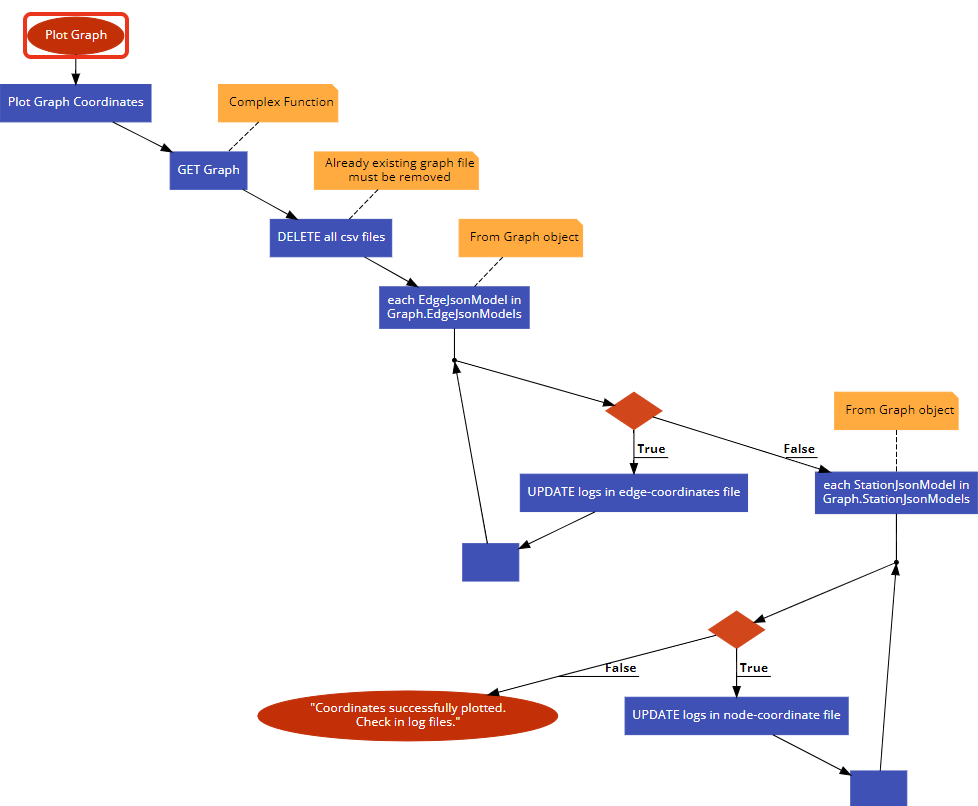

##PlotStationToStationPath

In [ ]:
Plot Station To Station Path;
//list of PathSummaryModel having every real station to real station combination shortest paths
CREATE shortestPaths;
for(each path in shortestPaths)
{
  REMOVE virtual-stations from
  path.PlannedPath;
  REVERSE path.PlannedPath;
}

for(each route in shortestPaths)
{
  // distance is being calculated using route.FromStation and route.ToStation
  ASSIGN route.Distance;
}

DELETE existing station-to-station-path file;
// using shortestPaths
CREATE new station-to-station-path file;

return shortestPaths

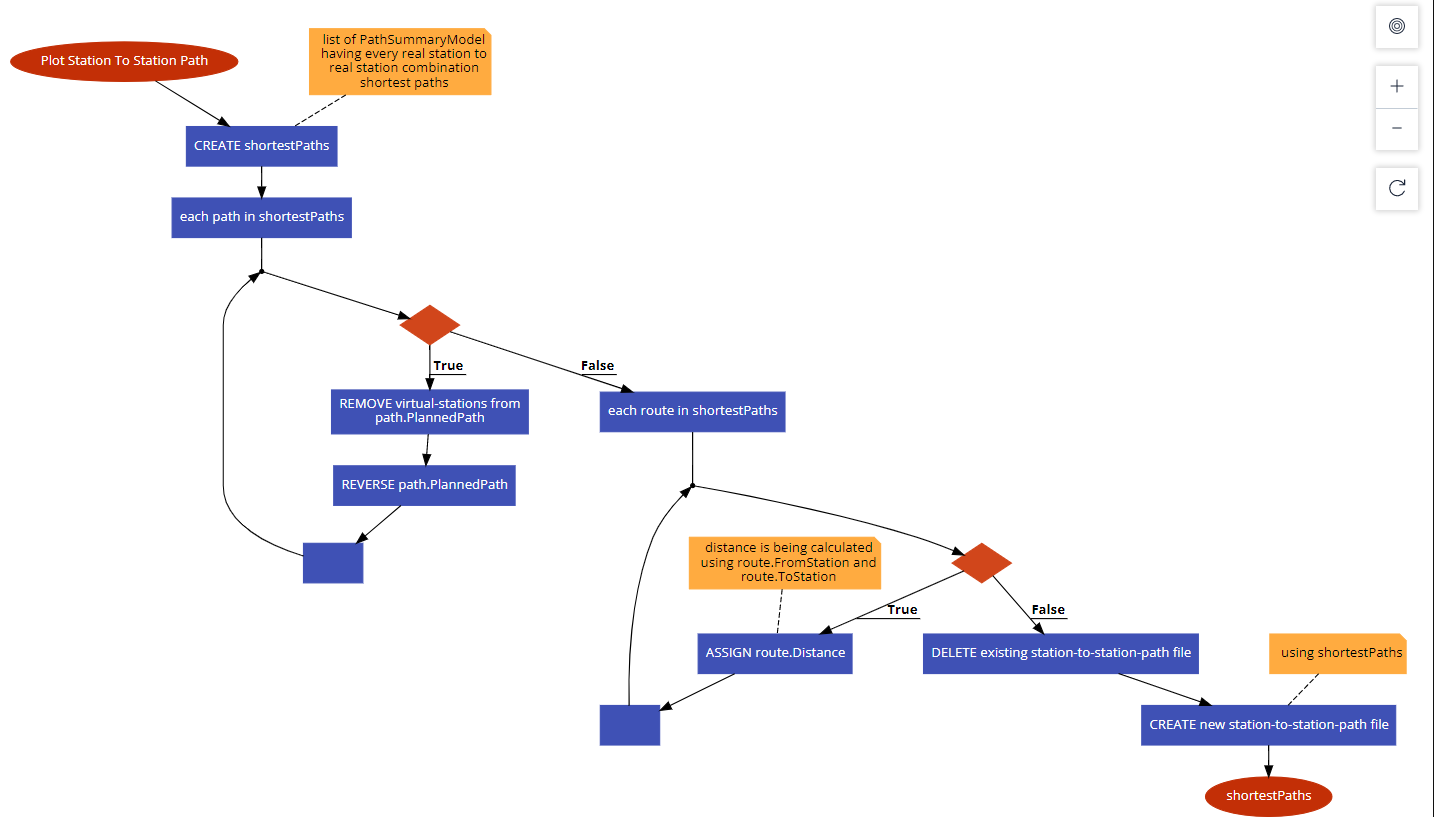

##PlotInfeedToInfeedJourney

In [ ]:
Plot Infeed To Infeed Journey;
// list of all infeed stations
GET infeedStations;
// list of all drop off stations
GET dropOffStations; 
for(each infeed in infeedStations)
{
  for(each dropOff in dropOffStations)
  {
    // infeed -> dropOff -> exit -> infeed
    ADD shortestVirtualPath in plannedPath;
    ADD closestExitPath for dropOff in plannedPath;
    ADD closestInfeedPath for last
    station in plannedPath;
    ADD directions for plannePath
    in pathDirections;
    REMOVE virtual stations from plannedPath;
    REVERSE plannedPath and pathDirections;
    //{ From = infeed.SId; To = dropOff.Si=Id; PlannedPath = plannedpath; Directions = pathdirections }
    ADD PathSummaryModel to path object;
  }
}
DELETE existing infeed-to-infeed-path file;
CREATE new infeed-to-infeed-path
file from path object;
return path;

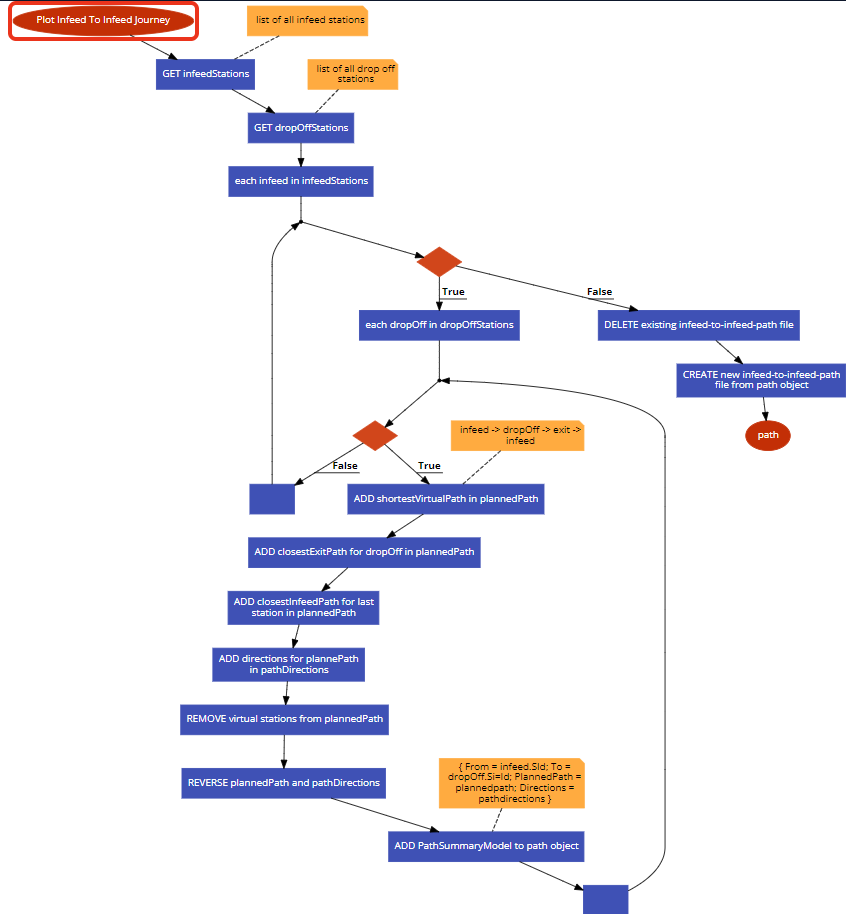

##PlottingPosition

In [ ]:
// Takes nodeId, fromSId, toSId as input
Position Plotting
( GET CoordinateOfNode );

GET virtualNode for a realNode;
GET Graph;
// using FromSId of virtualNode
GET currentStation;
// requiredEdge = virtualNode.EdgeId
GET requiredEdge;
if(requiredEdge == null)
{
  return null
}
if(requiredEdge.Type == "L")
{
  // move functions implemented in MoveAlongLineStaticService
  MOVE forward on line or edge
  and store result in nodeCoordinate;
  return nodeCoordinate;
}
if(requiredEdge.Type == "C" && clockwise == True)
{
  MOVE forward on curve clockwise
  and store result in nodeCoordinate;
  return nodeCoordinate;
}
MOVE forward on curve anticlockwise
and store result in nodeCoordinate;
return nodeCoordinate;

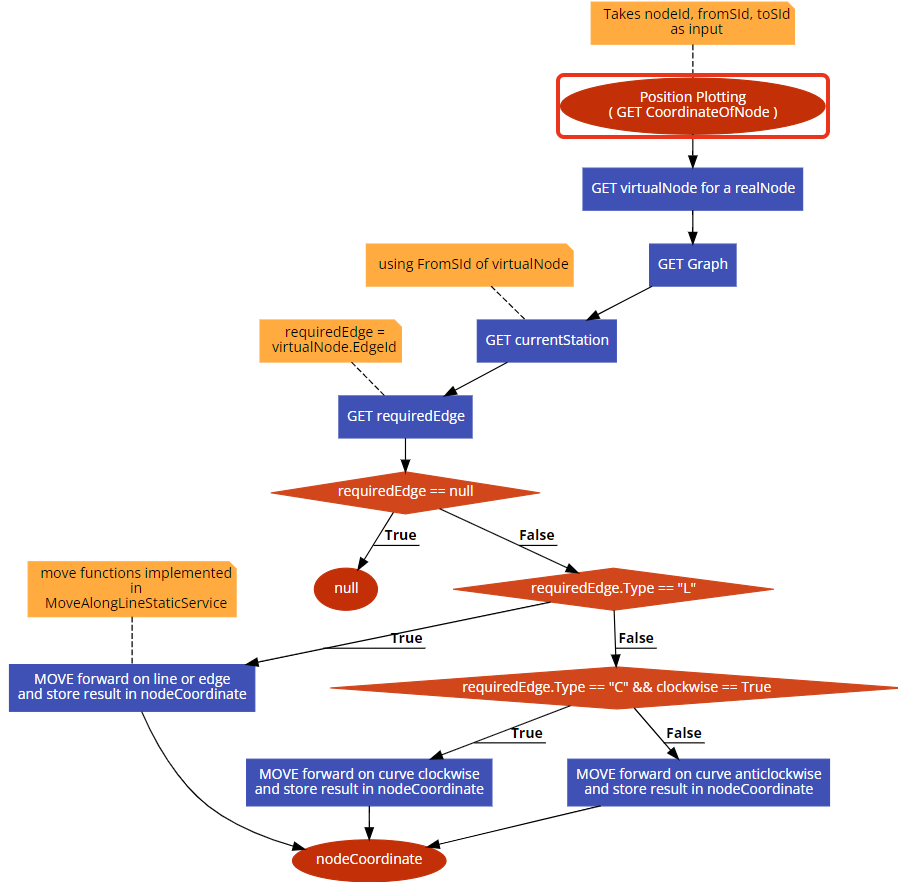

#Functions

##UpdateBotPosition

In [ ]:
// Taking unresolvedBotPosition as an input which is a dictionary {botId : BotPosition}
UPDATE BOT POSITIONS;

// dictionary {botId : BotPosition}
CLEAR _botPositions object;

ADD unresolvedBotPositions
INTO _botPositions;

if(no previous botPositions found)
{
  return _botPositions;
}

for(each botPos in prev. botPositions)
{
  if (not already present
  in _botPositions)
  {
    ADD (botId : BotPosition)
    in _botPositions;
  }
}

INCREMENT botLogPositionId by 1;

return clone of _botposition

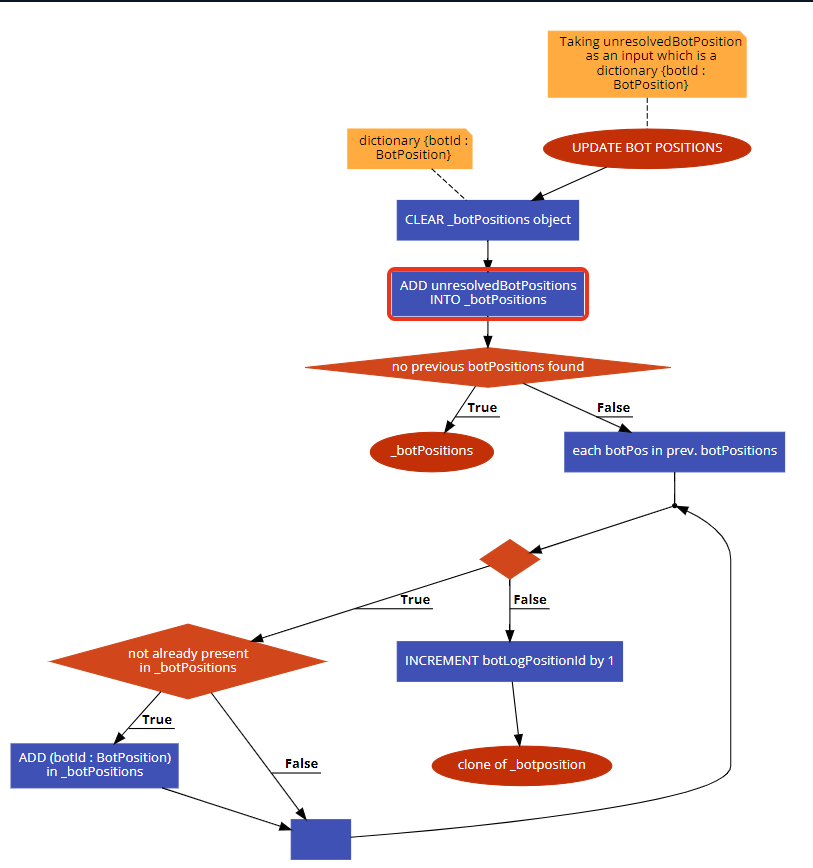

##UpdateBotStationRequest

In [ ]:
// Taking unresolvedBotPosition = {botId : BotPosition} and stations = {stationId : StationTrafficModel) as input
UPDATE BOT STATION REQUEST;

// list of BotStationRequest
CLEAR _botStationRequests object;

for(each botPosition in unresolvedBotPositions)
{
  // [Check] Current Station Id exists
  if(allocatedSId || occupiedSId not in stations)
  {
    ADD Station Request of type INVALID;
  }
  
  // Case: Occupied Station is not updated
  if(botId in station where occupiedSId
  match is not same as botPosition KEY)
  {
    ADD Station Request of type UNAUTHORISED;
  }
  
  // Case: Occupied Station status is not updated
  if(requestType in station where occupiedSId
  match is not same as OCCUPIED)
  {
    ADD Station Request of type OCCUPIED;
  }
  
  // Case: Allocated Station  is not updated or Status is not updated
  if(either botId or requestType in
  station where allocatedSId match
  is not same as botPosition KEY or
  ALLOCATE respectively)
  {
    ADD Station Request of type ALLOCATE;
  }
  // Case: Assigned Station  is not provided
  if(assignedSId not in stations)
  {
    GET station info. from graph;
    
  }
  
}

INCREMENT botLogPositionId by 1;

return clone of _botposition

##UpdateStationAllocationPlan

#Simulation

##Bot Manifestation (get_next_station.py)

In [ ]:
LOG : INFO in datacamp.log
CONNECT with local IP;
INITIALISE variables and Traffic params
INITIALISE Bot params;

UPDATE parcel droppped info.
to clear past residue;
GET plannedPath from intial
station of Bot;
ASSIGN infeedSId and occupiedSId params of Bot
as first and last value of plannedPath;
if(length of plannedPath > 1
(many stations in between))
{
  // allocated station = next station, assigned = next to next, reserved = next to next to next
  //distance is always between occupied and allocated
  ASSIGN allocatedSId and distanceToNextS
  params of Bot;
}
while(True)
{
  CALCULATE speed of Bot using prev. speed
  and motor param
  CALCULATE path_travelled by Bot
  GET Node_Id of Bot;
  if(path_travelled > distanceToNextS
  (has crossed the station))
  {
    RECALCULATE path_travelled
    GET Node_Id
    DELETE station from plannedPath
    REASSIGN occupiedS of Bot;
    
    if(length of plannedPath == 1
    (last station))
    {
      SET motor to 0
      continue;
    }
    //[check] the length of plannedPath before assigning to assignedSId and reservedSId
    REASSIGN allocatedSId, assignedSId, reservedSId
    and distancetoNextS of Bot;
    PRINT Bot Info.;
    
    if(occupiedSId == infeedSId and length
    of plannedPath == 1
    (at infeed))
    {
      GET droppingS(next dropping assg.);
      if(droppingS == null
      (no next dropping assg.))
      {
        continue
      }
      UPDATE plannedPath;
      if(plannedPath is None)
      {
        continue
      }
      REASSIGN infeedSId, allocatedSId, assignedSId, reservedSId
      and distanceToNextStation
      CLEAR infeed station;
    }
    
    UPDATE motor by GETTING motor-status
    from server;
  }
}

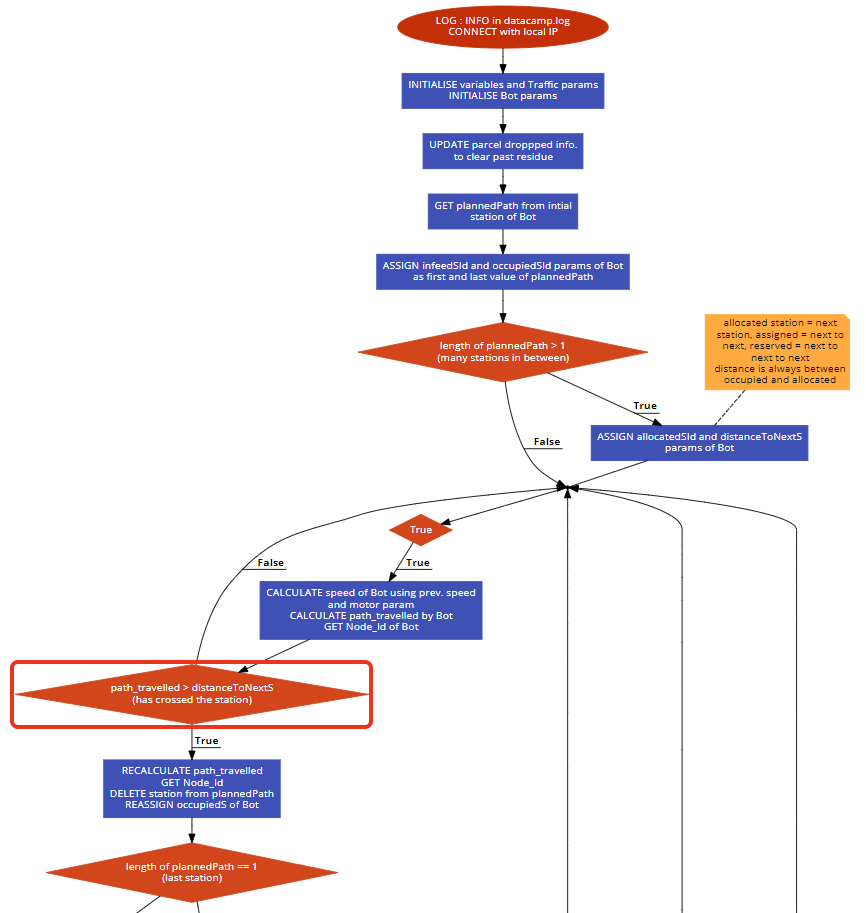

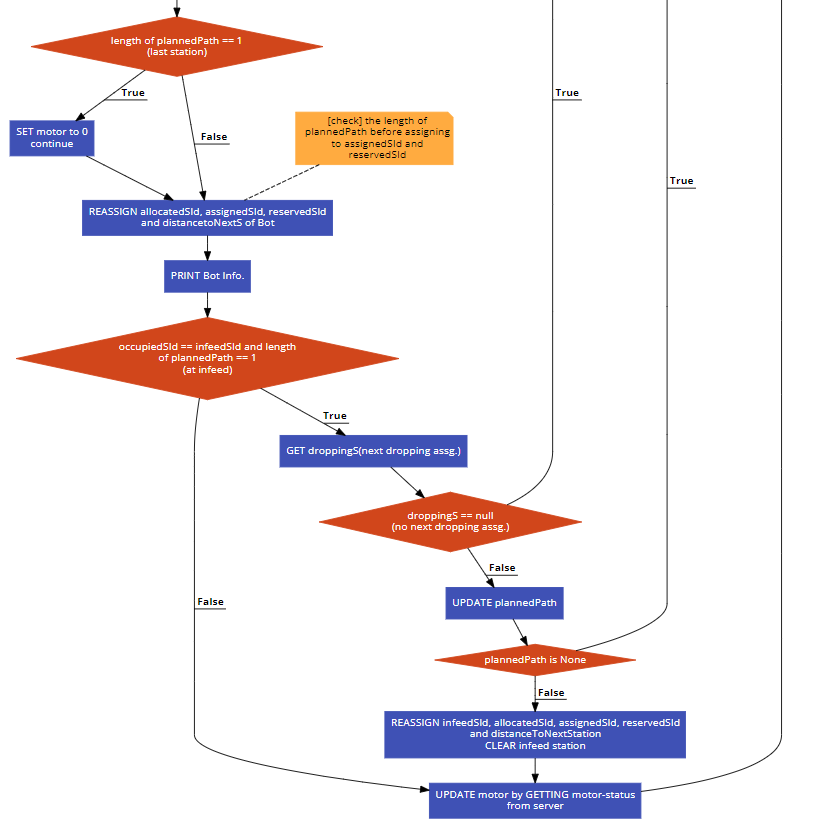

##Messaging Server (main_9999.py)

In [ ]:
CONNECT to local IP;
// bot_manger is a class with extension functions
INSTANTIATE bot_manger.py;

INITIALISE Bot and Bot_Motors;
while(True)
{
  DELETE bot_position file;
  if(delete successful)
  {
    break
  }
}
// bot_position file is created/updated by this msg server
CREATE Thread 1 for task update_bot_positions;
CREATE Thread 2 for task read_bot_motors;

START Thread 1;
//notify about start of server
NOTIFY on desktop;

// handles (UDP) datagram based http request
KEEP RUNNING the server to handle request;


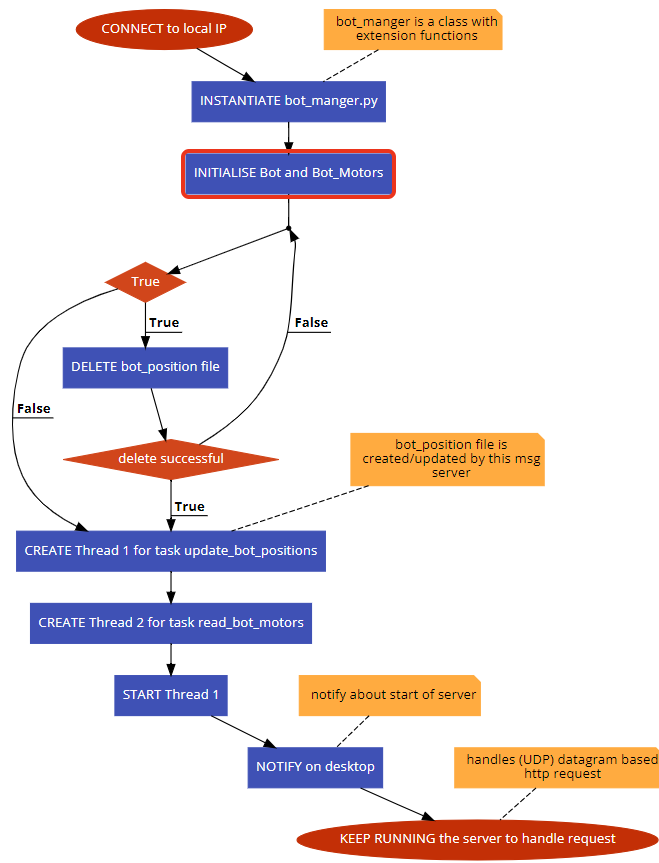